### **PROYECTO MONITOREO DE DATOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'datos_temp_hum.csv')

In [4]:
data.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,latitude,longitude,elevation,status
0,2024-01-18T11:22:09-06:00,1,47.0,25.3,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-18T11:23:03-06:00,2,49.0,24.5,746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-18T11:24:09-06:00,3,49.0,24.5,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-18T11:25:01-06:00,4,49.0,24.5,614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-18T11:25:53-06:00,5,49.0,24.5,653.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,entry_id,field1,field2,field3,field4,field5,field6,latitude,longitude,elevation,status
count,30454.000000,30451.000000,30451.000000,30454.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15227.500000,50.857673,24.231024,2072.756748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8791.456885,21.487591,9.392279,686.274322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,9.000000,9.200000,400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7614.250000,32.000000,17.400000,1674.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15227.500000,56.000000,21.400000,2060.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22840.750000,70.000000,31.300000,2407.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,30454.000000,81.000000,45.500000,4563.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(30454, 12)

In [7]:
data.columns

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'latitude', 'longitude', 'elevation', 'status'],
      dtype='object')

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30454 entries, 0 to 30453
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  30454 non-null  object 
 1   entry_id    30454 non-null  int64  
 2   field1      30451 non-null  float64
 3   field2      30451 non-null  float64
 4   field3      30454 non-null  float64
 5   field4      0 non-null      float64
 6   field5      0 non-null      float64
 7   field6      0 non-null      float64
 8   latitude    0 non-null      float64
 9   longitude   0 non-null      float64
 10  elevation   0 non-null      float64
 11  status      0 non-null      float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.8+ MB


In [9]:
numerical_features = list(data.select_dtypes(exclude='object').columns)

print('La cantidad de variables numéricas en el dataset son: {} \n'.format(len(numerical_features)))
print('Las variables numéricas son:', numerical_features)

La cantidad de variables numéricas en el dataset son: 11 

Las variables numéricas son: ['entry_id', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'latitude', 'longitude', 'elevation', 'status']


In [10]:
data2=data.drop(columns=['field4', 'field5', 'field6', 'latitude', 'longitude', 'elevation', 'status'])
data2.head()

,created_at,entry_id,field1,field2,field3
0,2024-01-18T11:22:09-06:00,1,47.0,25.3,666.0
1,2024-01-18T11:23:03-06:00,2,49.0,24.5,746.0
2,2024-01-18T11:24:09-06:00,3,49.0,24.5,497.0
3,2024-01-18T11:25:01-06:00,4,49.0,24.5,614.0
4,2024-01-18T11:25:53-06:00,5,49.0,24.5,653.0


In [11]:
numerical_features = list(data2.select_dtypes(exclude='object').columns)

print('La cantidad de variables numéricas en el dataset son: {} \n'.format(len(numerical_features)))
print('Las variables numéricas son:', numerical_features)

La cantidad de variables numéricas en el dataset son: 4 

Las variables numéricas son: ['entry_id', 'field1', 'field2', 'field3']


In [12]:
print("La descripción detallada de las variables numéricas es: \n")
print(round(data2[numerical_features].describe()))

La descripción detallada de las variables numéricas es: 

       entry_id   field1   field2   field3
count   30454.0  30451.0  30451.0  30454.0
mean    15228.0     51.0     24.0   2073.0
std      8791.0     21.0      9.0    686.0
min         1.0      9.0      9.0    400.0
25%      7614.0     32.0     17.0   1674.0
50%     15228.0     56.0     21.0   2060.0
75%     22841.0     70.0     31.0   2407.0
max     30454.0     81.0     46.0   4563.0


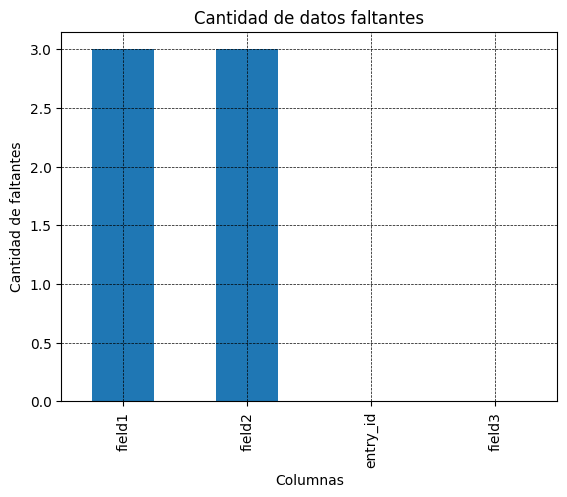

In [13]:
data2[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Cantidad de datos faltantes')
plt.xlabel('Columnas'), plt.ylabel('Cantidad de faltantes') 
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()

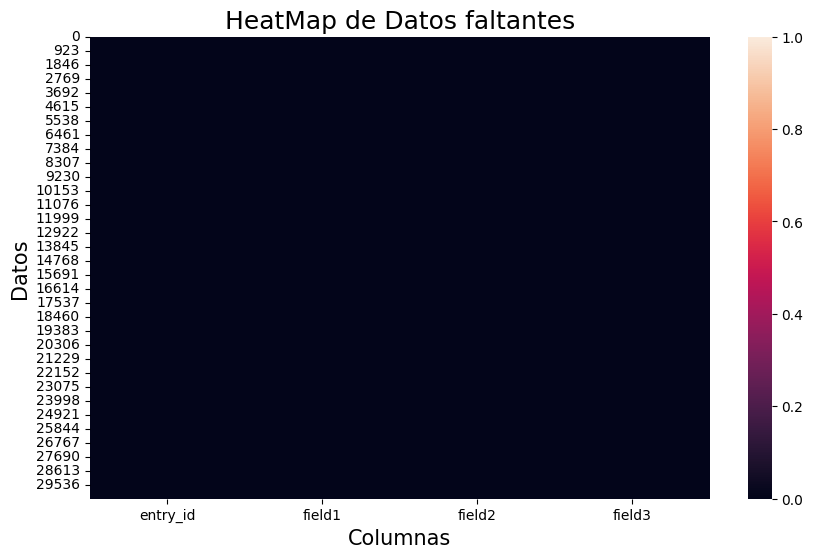

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data[numerical_features].isnull(),linecolor='white')
plt.title("HeatMap de Datos faltantes",fontsize = 18)
plt.xlabel('Columnas', fontsize = 15), plt.ylabel('Datos', fontsize = 15) 
plt.show()

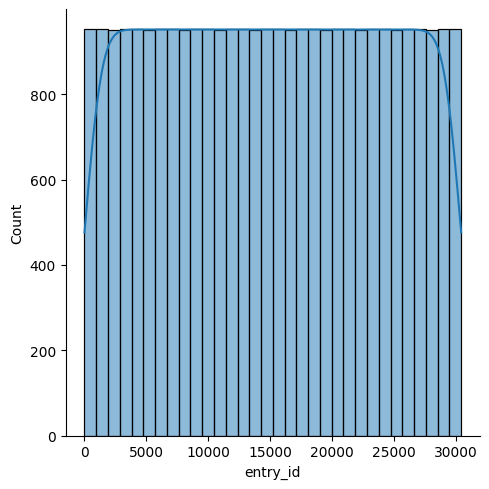

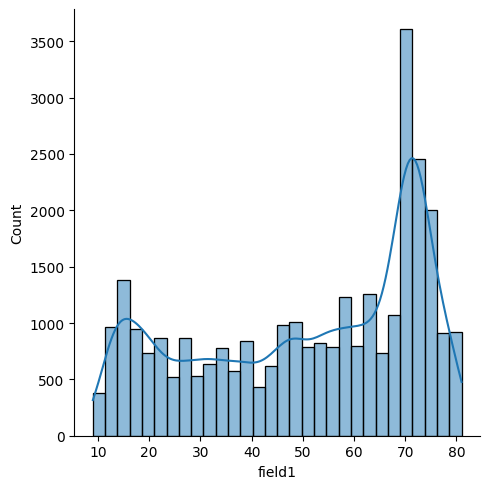

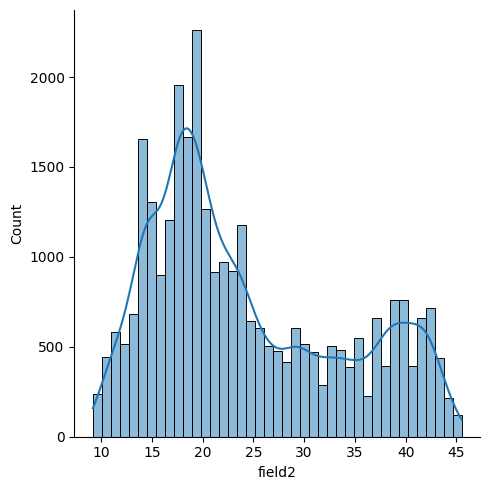

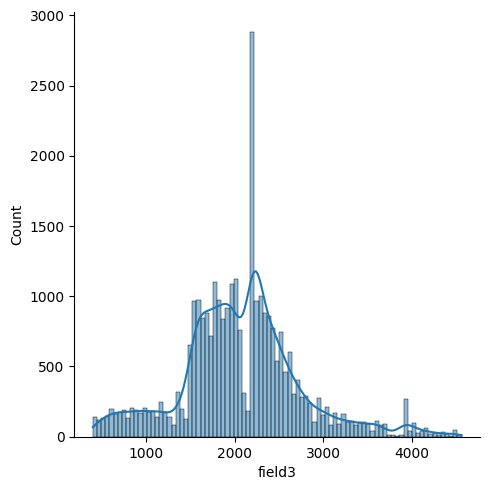

In [16]:
for i in numerical_features:
    sns.displot(data2[i],kde=True)
    plt.show()

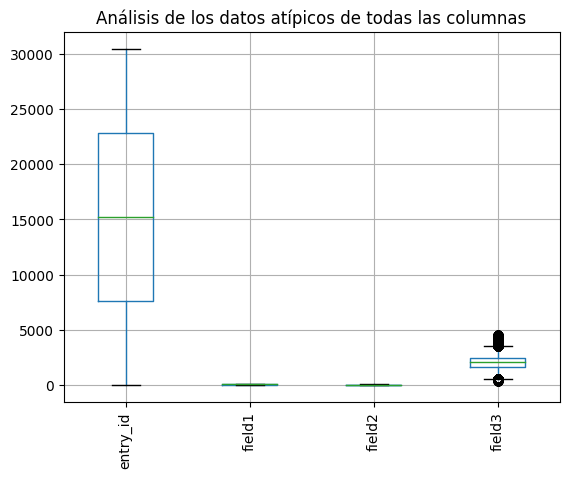

In [21]:
#Análisis de los datos atípicos de todas las columnas. 

data2.boxplot(rot=90)
plt.title("Análisis de los datos atípicos de todas las columnas")
plt.show()

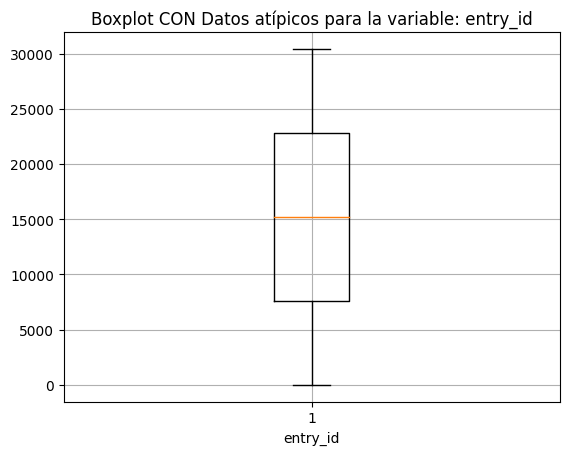

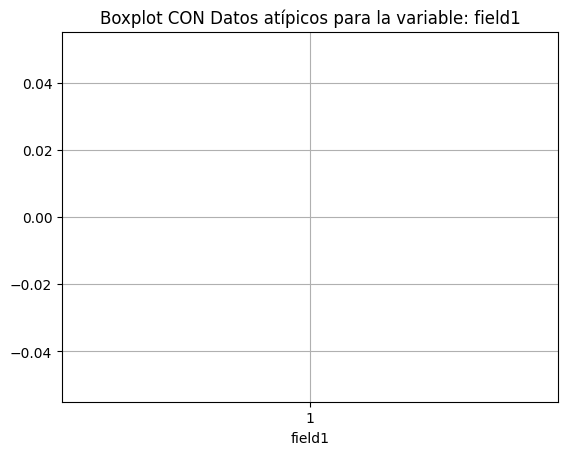

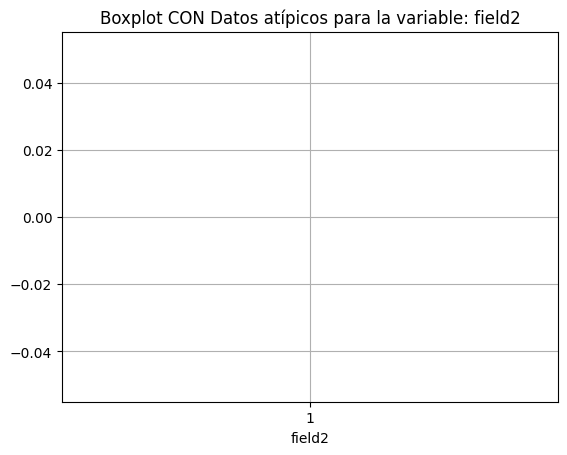

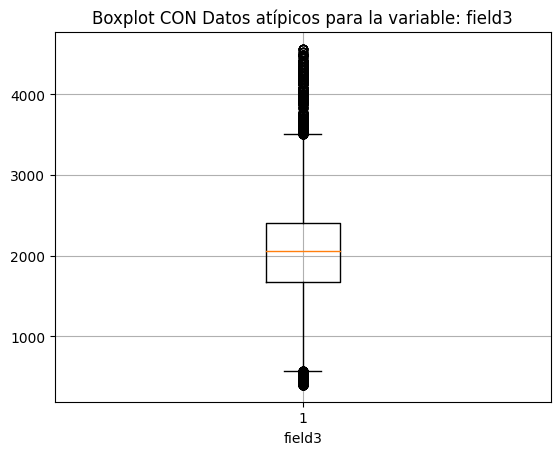

In [22]:
for i in numerical_features:
    plt.boxplot(data2[i])
    plt.title(f'Boxplot CON Datos atípicos para la variable: {i}')
    plt.xlabel(i), plt.grid()
    plt.show()

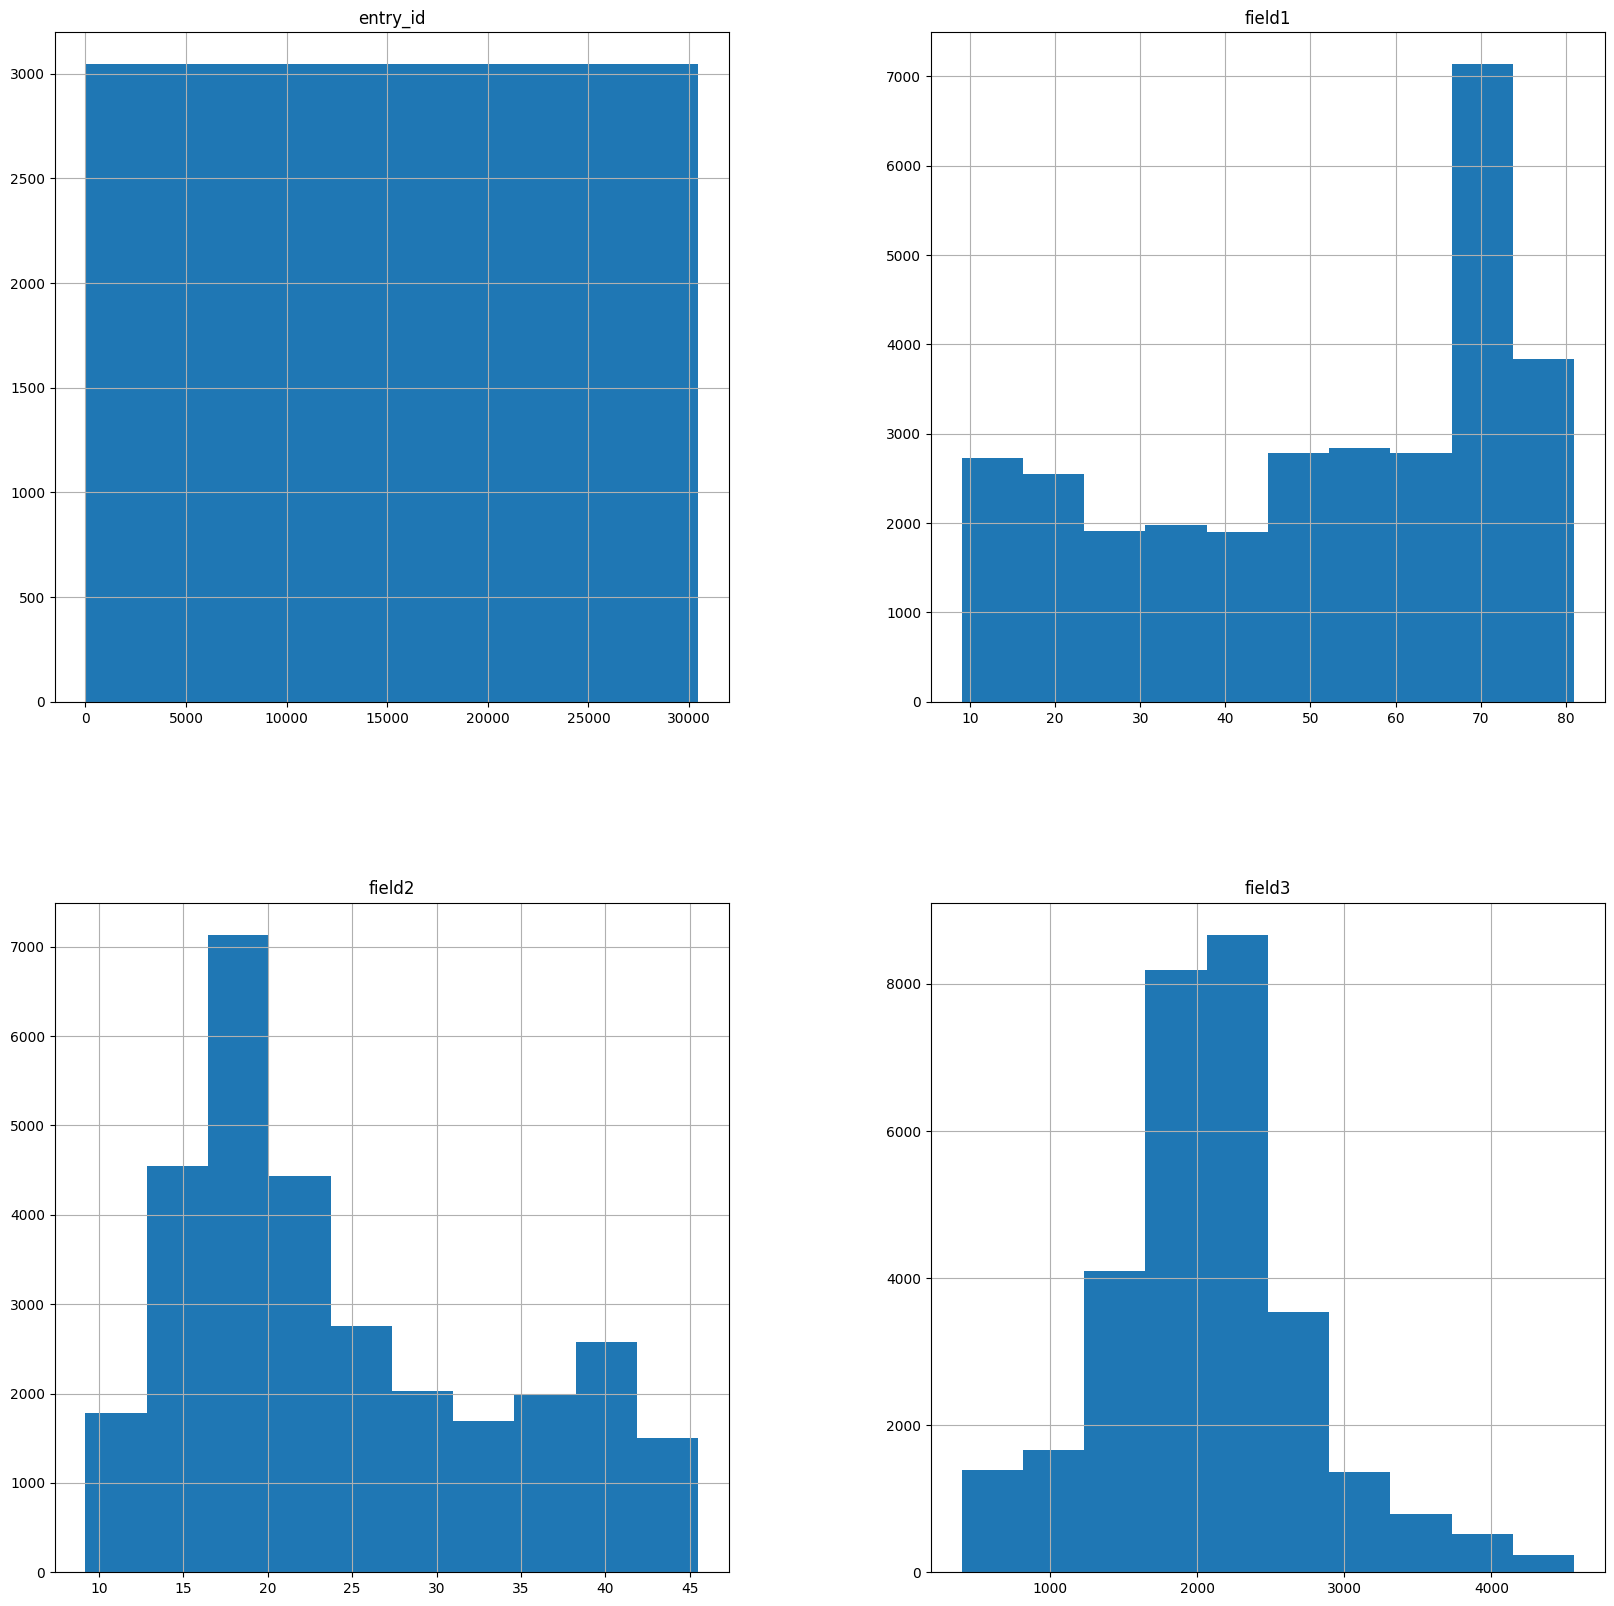

In [28]:
data2[numerical_features].hist(bins=10,figsize=(20,20))
plt.show()

<Axes: xlabel='field1', ylabel='field3'>

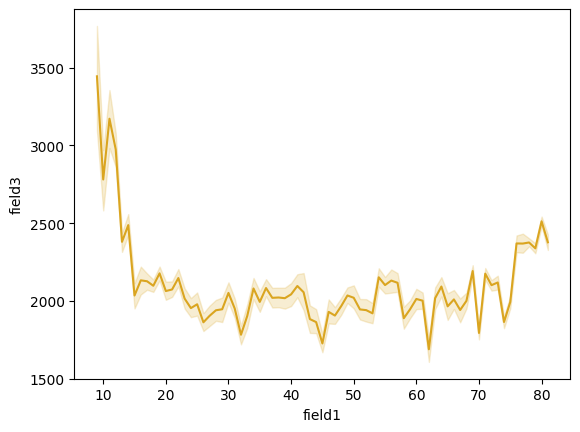

In [39]:
sns.lineplot(data=data2,x='field1',y='field3',color='goldenrod')

<Axes: ylabel='field1'>

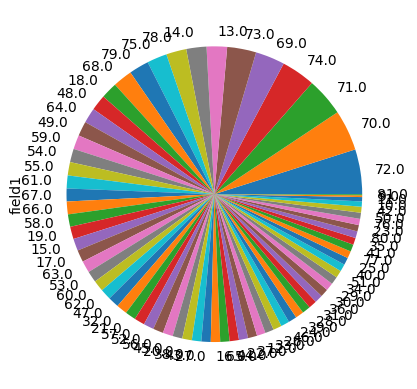

In [34]:
data2['field1'].value_counts().plot(kind='pie')

<Axes: ylabel='field2'>

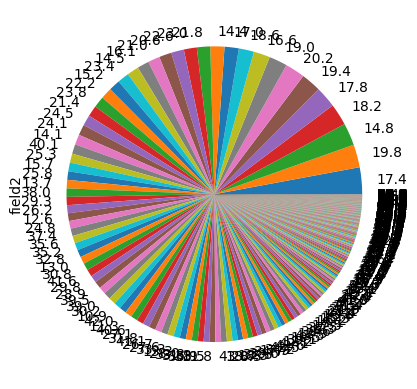

In [38]:
data['field2'].value_counts().plot(kind='pie')

<Axes: ylabel='field3'>

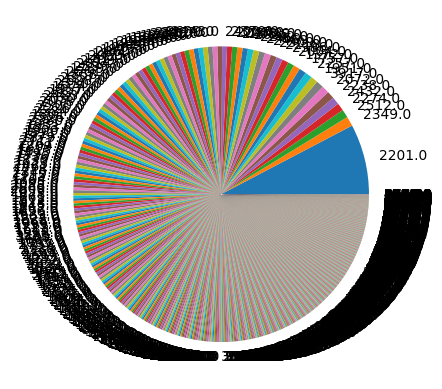

In [40]:
data['field3'].value_counts().plot(kind='pie')

In [41]:
data2.corr()

C:\Users\betot\AppData\Local\Temp\ipykernel_19344\1981098430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,entry_id,field1,field2,field3
entry_id,1.000000,0.053316,-0.122694,0.638421
field1,0.053316,1.000000,-0.953094,-0.065232
field2,-0.122694,-0.953094,1.000000,0.061844
field3,0.638421,-0.065232,0.061844,1.000000


C:\Users\betot\AppData\Local\Temp\ipykernel_19344\622810580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),linewidths=0.5,annot=True,fmt=".2f")


<Axes: >

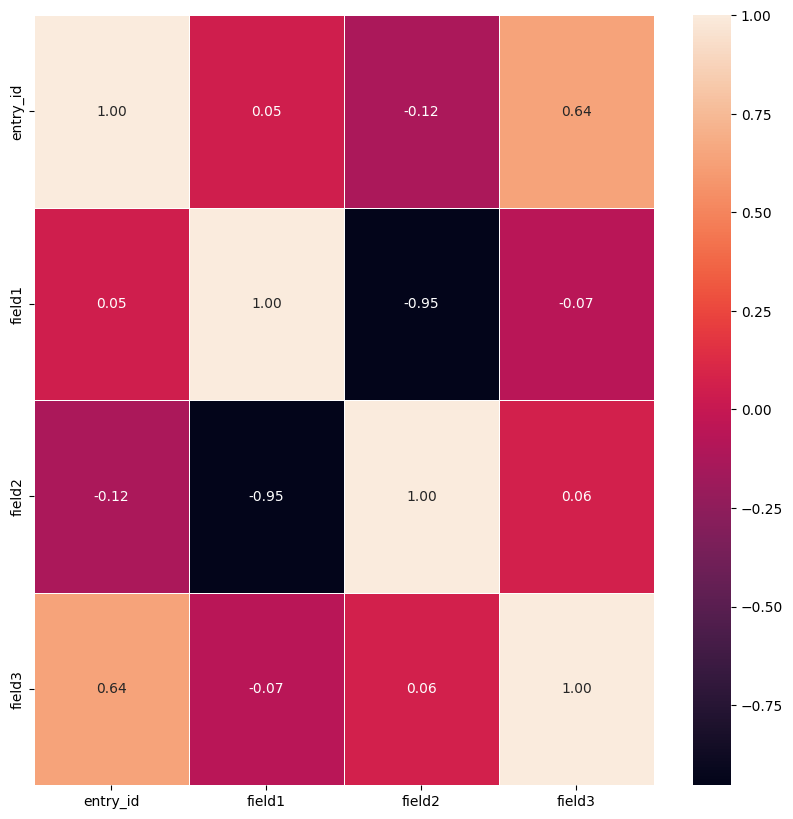

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(),linewidths=0.5,annot=True,fmt=".2f")